# Les DB sont téléchargeables ici :

<ol>
   <li><h3> Catalogue de formation ou src/moncompteformation_catalogueformation.csv</h3>https://opendata.caissedesdepots.fr/explore/dataset/moncompteformation_catalogueformation/export/?disjunctive.nom_departement&disjunctive.nom_region&disjunctive.libelle_niveau_sortie_formation&disjunctive.libelle_nsf_1&disjunctive.siret&disjunctive.code_region</li> </br>

   <li><h3> Formations engagees  ou src/moncompteformation_formations_engagees.csv</h3>https://opendata.caissedesdepots.fr/explore/dataset/moncompteformation_formations_engagees/export/?disjunctive.domaine_formation_nsf&disjunctive.region_lieu_formation&disjunctive.departement_lieu_formation&disjunctive.intitule_certification</li> </br>

   <li><h3> Usagers  ou src/moncompteformation-les-usagers.csv</h3>https://opendata.caissedesdepots.fr/explore/dataset/moncompteformation-les-usagers/export/?disjunctive.annee_entree_formation&disjunctive.statut_dossier&disjunctive.region_domiciliation&disjunctive.classe_age&disjunctive.situation_titulaire&disjunctive.code_region_domiciliation</li> </br>
   
</ol>

Le fichier regions.geojson est à télécharger ici : https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson

# Analyse du fichier catalogue de formation

1. **```date_chargement```** : *La date à laquelle les données ont été chargées dans le fichier.*
Ces données ne permettent donc pas d'effectuer des analyses dans le temps
2. **```nom_of```**: *Le nom de l'organisme de formation (OF).*
3. **```nom_departement```**: *Le nom du département où se trouve l'organisme de formation.*
4. **```nom_region```**: *Le nom de la région où se trouve l'organisme de formation.*
5. **```type_referentiel```**: *Le type de référentiel utilisé pour les données avec : 'RS' : Répertoire Spécifique 'RNCP' Répertoire National des Certifications Professionnelles et 'RS RNCP' *
6. **```code_rs```**: *Le code RS (Répertoire Spécialisé) pour la formation. (répertoire géré par France Compétences, qui liste les certifications et habilitations à exercer une activité professionnelle) * 
7. **```code_rncp```**: *Le code RNCP (Répertoire National des Certifications Professionnelles) pour la formation. (répertorie toutes les certifications professionnelles reconnues en France)*
8. **```intitule_certification```**: *L'intitulé de la certification associée à la formation.*
9. **```libelle_niveau_sortie_formation```**: *Le niveau de sortie de la formation, par exemple, niveau de diplôme ou de qualification.*
10. **```code_formacode_1```** à **```code_formacode_5```**: *Les codes Formacode associés à la formation. (système de classification des formations professionnelles en France)*
11. **```libelle_code_formacode_principal```**: *Le libellé du code Formacode principal pour la formation.*
12. **```code_rome_1```** à **```code_rome_5```**: *Les codes 'ROME' : Répertoire Opérationnel des Métiers et des Emploi associés à la formation. (système de classification des emplois en France)*
13. **```libelle_nsf_1```** à **```libelle_nsf_3```**: *Les libellés des codes NSF (Nomenclature des Spécialités de Formation) associés à la formation. La NSF est une classification des formations en France.*
14. **```code_nsf_1` à `code_nsf_3```**: *Les codes NSF (Nomenclature des Spécialités de Formation) associés à la formation.*
15. **```code_certifinfo```**: *Le code Certif Info pour la formation. (système d'information sur les certifications professionnelles en France)*
16. **```siret_of```**: *Le numéro SIRET (Système d'Identification du Répertoire des Etablissements) de l'organisme de formation.*
17. **```numero_formation```**: *Le numéro de la formation.*
18. **```intitule_formation```**: *L'intitulé de la formation.*
19. **```points_forts```**: *Les points forts de la formation.*
20. **```nb_action```**: *Le nombre d'actions de formation.*
21. **```nb_session_active```**: *Le nombre de sessions de formation actives.*
22. **```nb_session_a_distance```**: *Le nombre de sessions de formation à distance.*
23. **```nombre_heures_total_min```**: *Le nombre minimum d'heures pour la formation.*
24. **```nombre_heures_total_max```**: *Le nombre maximum d'heures pour la formation.*
25. **```nombre_heures_total_mean```**: *La moyenne du nombre d'heures pour la formation.*
26. **```frais_ttc_tot_min```**: *Les frais TTC (Toutes Taxes Comprises) minimums pour la formation.*
27. **```frais_ttc_tot_max```**: *Les frais TTC maximums pour la formation.*
28. **```frais_ttc_tot_mean```**: *Les frais TTC moyens pour la formation.*
29. **```code_departement```**: *Le code du département où se trouve l'organisme de formation.*
30. **```code_region```**: *Le code de la région où se trouve l'organisme de formation.*

Extrapolation :
31. **```RS```**: *Une colonne liée au code RS (Répertoire Spécialisé), probablement une version différente ou un formatage du code RS.*
32. **```RNCP```**: *Une colonne liée au code RNCP (Répertoire National des Certifications Professionnelles), probablement une version différente ou un formatage du code RNCP.*
33. **```nbaction_nbheures```**: *Une colonne qui pourrait représenter la relation entre le nombre d'actions de formation et le nombre d'heures de formation, ou une mesure combinée de ces deux variables.*
34. **```coderegion_export```**: *Le code de la région utilisé pour l'exportation des données. Il peut s'agir d'une version différente ou d'un formatage du code de la région.*

Ajout :
10. **```domaine_1```** à **```domaine_5```**: *Réduction des Formacodes différents sous 14 grands domaines.* </br></br></br>


In [1]:
#imports

import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np

In [2]:
#importing datasets
data = pd.read_csv('src/moncompteformation_catalogueformation.csv', sep=';', low_memory=False)
fcod = pd.read_csv("src/FCod_filtered.csv", sep=';', encoding='ISO-8859-1', on_bad_lines='skip', dtype=str)

# A propos des données manquantes :

In [3]:
#Missing data

# compter le nombre de valeurs manquantes par colonne et son pourcentage
valeurs_manquantes = data.isna().sum()
pourcentage_valeurs_manquantes = (valeurs_manquantes / len(data)) * 100
valeurs_manquantes_df = pd.DataFrame({'Nom colonne': valeurs_manquantes.index,
                                      'Nombre de valeurs manquantes': valeurs_manquantes.values,
                                      'Pourcentage de valeurs manquantes': pourcentage_valeurs_manquantes.values})

print(valeurs_manquantes_df.to_string(index=False))

                     Nom colonne  Nombre de valeurs manquantes  Pourcentage de valeurs manquantes
                 date_chargement                             1                           0.000456
                          nom_of                             0                           0.000000
                 nom_departement                         57616                          26.285271
                      nom_region                         57616                          26.285271
                type_referentiel                             0                           0.000000
                         code_rs                             0                           0.000000
                       code_rncp                             0                           0.000000
          intitule_certification                             0                           0.000000
 libelle_niveau_sortie_formation                        163348                          74.521773
                code

On affiche les données qui ont entre 0 (non inclus) et 3% (inclus) </br>
Puis les données supérieures a 3% (non inclus)

In [4]:
# Filtrer le DataFrame pour afficher uniquement les colonnes avec un pourcentage de valeurs manquantes supérieur à 3%
valeurs_manquantes_df_filtré = valeurs_manquantes_df[ (valeurs_manquantes_df['Pourcentage de valeurs manquantes'] <= 3) & (valeurs_manquantes_df['Pourcentage de valeurs manquantes'] > 0) ]

# Afficher les résultats filtrés
print(valeurs_manquantes_df_filtré.to_string(index=False))


                     Nom colonne  Nombre de valeurs manquantes  Pourcentage de valeurs manquantes
                 date_chargement                             1                           0.000456
                code_formacode_1                          5450                           2.486371
libelle_code_formacode_principal                          5451                           2.486827
                   libelle_nsf_1                             6                           0.002737
                      code_nsf_1                             6                           0.002737
                numero_formation                             1                           0.000456
              intitule_formation                             1                           0.000456
                    points_forts                          1655                           0.755035
                       nb_action                             2                           0.000912
               nb_se

In [6]:
# Filtrer le DataFrame pour afficher uniquement les colonnes avec un pourcentage de valeurs manquantes supérieur à 3%
valeurs_manquantes_df_filtré = valeurs_manquantes_df[valeurs_manquantes_df['Pourcentage de valeurs manquantes'] > 3]

# Afficher les résultats filtrés
print(valeurs_manquantes_df_filtré.to_string(index=False))


                    Nom colonne  Nombre de valeurs manquantes  Pourcentage de valeurs manquantes
                nom_departement                         57616                          26.285271
                     nom_region                         57616                          26.285271
libelle_niveau_sortie_formation                        163348                          74.521773
               code_formacode_2                         98098                          44.753758
               code_formacode_3                        188023                          85.778873
               code_formacode_4                        212287                          96.848468
               code_formacode_5                        217211                          99.094870
                    code_rome_1                        161106                          73.498939
                    code_rome_2                        188692                          86.084080
                    code_rome_

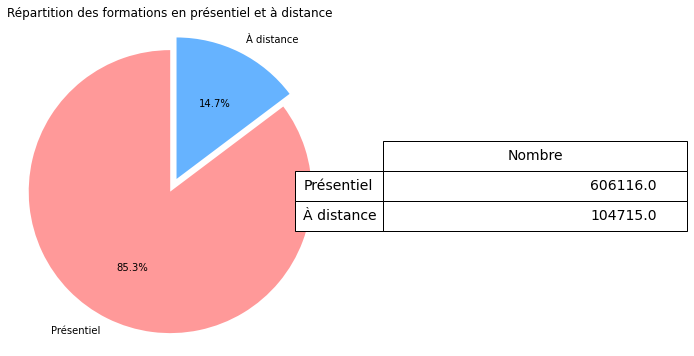

Nombre de lignes avec des données manquantes pour 'nom_departement' ou 'nom_region' et qui sont des formations à distance : 56170
soit 97.49% des données manquantes pour ces colonnes


In [7]:
#Fig 1 : Tentative d'explication du nombre de missing_departements et nom_region

# Calculer la répartition des formations en présentiel et à distance
presentiel = data['nb_session_active'].sum()
distance = data['nb_session_a_distance'].sum()

labels = ['Présentiel', 'À distance']
sizes = [presentiel, distance]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'black'})
ax1.axis('equal')
ax1.set_title('Répartition des formations en présentiel et à distance')

cell_text = [[presentiel], [distance]]
table = ax2.table(cellText=cell_text, rowLabels=labels, colLabels=['Nombre'], loc='center')
ax2.axis('off')  # Hide axis
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 2.5)
plt.show()


missing_data_rows = data[data['nom_departement'].isna() | data['nom_region'].isna()]
distance_missing_data_rows = missing_data_rows[missing_data_rows['nb_session_a_distance'] > 0]

total_missing_data_rows = len(missing_data_rows)
percentage = (len(distance_missing_data_rows) / total_missing_data_rows) * 100

print("Nombre de lignes avec des données manquantes pour 'nom_departement' ou 'nom_region' et qui sont des formations à distance :", len(distance_missing_data_rows))
print(f"soit {percentage:.2f}% des données manquantes pour ces colonnes")



Les données manquantes pour les noms regions et noms departements correspondent aux données manquantes. Il faut cependant filtrer les données en présentiel lors de la création de map car ce pourcentage ne correspond pas à 100%

In [8]:
colonnes_à_supprimer = ["date_chargement", "code_formacode_1", "libelle_code_formacode_principal",
                        "libelle_nsf_1", "code_nsf_1", "numero_formation", "intitule_formation",
                        "points_forts", "nb_action", "nb_session_active", "nb_session_a_distance",
                        "nombre_heures_total_min", "nombre_heures_total_max", "nombre_heures_total_mean",
                        "frais_ttc_tot_min", "frais_ttc_tot_max", "frais_ttc_tot_mean", "nbaction_nbheures"]

# Nombre de lignes avant suppression
lignes_avant_suppression = data.shape[0]

for colonne in colonnes_à_supprimer:
    data = data.dropna(subset=[colonne])
    
    # Recalculer les valeurs manquantes et les pourcentages pour chaque colonne de data
    valeurs_manquantes = data.isna().sum()
    pourcentage_valeurs_manquantes = (valeurs_manquantes / len(data)) * 100
    valeurs_manquantes_df = pd.DataFrame({'Nom colonne': valeurs_manquantes.index,
                                          'Nombre de valeurs manquantes': valeurs_manquantes.values,
                                          'Pourcentage de valeurs manquantes': pourcentage_valeurs_manquantes.values})

    # Afficher les colonnes ayant un pourcentage de valeurs manquantes compris entre 0% et 3%
    valeurs_manquantes_df_filtré = valeurs_manquantes_df[(valeurs_manquantes_df['Pourcentage de valeurs manquantes'] > 0) & (valeurs_manquantes_df['Pourcentage de valeurs manquantes'] <= 3)]
    print(f"Après avoir supprimé les lignes avec des valeurs manquantes pour la colonne '{colonne}':")
    print(valeurs_manquantes_df_filtré.to_string(index=False))
    print("\n")

# Nombre de lignes après suppression
lignes_après_suppression = data.shape[0]

# Calculer le nombre de lignes supprimées
lignes_supprimées = lignes_avant_suppression - lignes_après_suppression

# Afficher le nombre de lignes supprimées
print(f"Nombre de lignes supprimées : {lignes_supprimées}")


Après avoir supprimé les lignes avec des valeurs manquantes pour la colonne 'date_chargement':
                     Nom colonne  Nombre de valeurs manquantes  Pourcentage de valeurs manquantes
                code_formacode_1                          5450                           2.486382
libelle_code_formacode_principal                          5450                           2.486382
                   libelle_nsf_1                             5                           0.002281
                      code_nsf_1                             5                           0.002281
                    points_forts                          1654                           0.754583
                       nb_action                             1                           0.000456
               nb_session_active                             1                           0.000456
           nb_session_a_distance                             1                           0.000456
         nombre_heures_

In [9]:
#modification on dataset, adding columns domaine_i with i going from 1 to 5

Dict_Domaine = {
"A": "Développement des compétences",
"B": "Sciences humaines, économie, droit, langues",
"C": "Sciences",
"D": "Technologies de l’information et de la communication, arts",
"E": "Production industrielle, transport, logistique",
"F": "Agriculture, environnement",
"G": "Transformation matière produit",
"H": "Génie civil, construction",
"J": "Mécanique, électronique",
"K": "Vie et gestion des organisations",
"L": "Commerce, marketing, finance",
"M": "Santé, social, sécurité",
"N": "Sport, loisirs, tourisme",
"P": "Énergie, électricité",
"Z":  "Formation à un logiciel"
}

# Créer une fonction pour obtenir le domaine correspondant au Formacode
def get_domain(formacode):
    first_letter = fcod.loc[fcod.iloc[:, 0] == formacode, 'first_letter'].values
    if len(first_letter) > 0:
        return Dict_Domaine[first_letter[0]]
    else:
        return None

# Check if the file exists
if not os.path.exists('src/moncompteformation_catalogueformation_formatted.csv'):
    fcod['code'] = fcod['code'].astype(str)
    # Extraire la première lettre de la chaîne de caractères dans la dernière colonne de fcod
    fcod['first_letter'] = fcod.iloc[:, -1].str[0]

    # Ajouter une nouvelle colonne 'domaine' à data en appliquant la fonction get_domain pour chaque colonne de Formacode
    for i in range(1, 6):
        print(i)
        column_name = f"code_formacode_{i}"
        domain_column_name = f"domaine_{i}"
        data[domain_column_name] = data[column_name].apply(lambda x: get_domain(str(int(x))) if not pd.isna(x) else None)


    # Save the new dataset as a CSV file
    data.to_csv('src/moncompteformation_catalogueformation_formatted.csv', index=False, sep=";")
else:
    # Read the formatted dataset if file exists
    data = pd.read_csv('src/moncompteformation_catalogueformation_formatted.csv', sep=';', on_bad_lines='skip', low_memory=False)


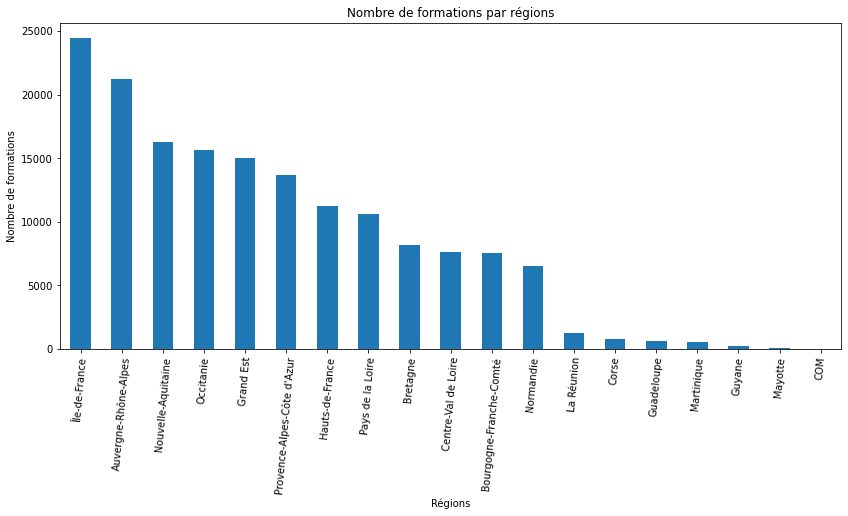

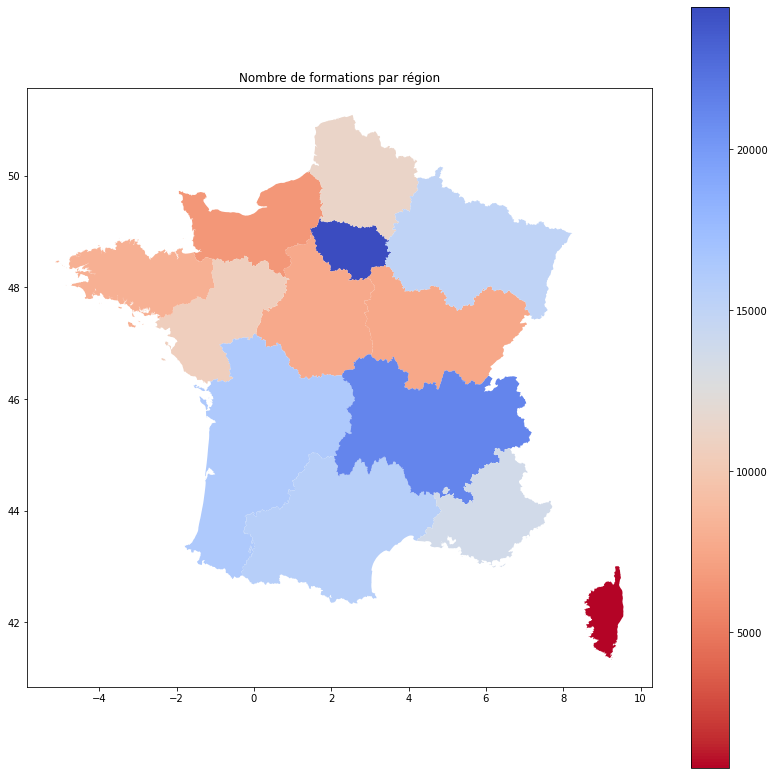

In [10]:
#1 - Counting numbers of formations by regions and bar ploting it .
formations_by_region = data['nom_region'].value_counts()

formations_by_region.plot(kind='bar', figsize=(14, 6))

plt.title('Nombre de formations par régions')
plt.xlabel('Régions')
plt.ylabel('Nombre de formations')
plt.xticks(rotation=85)  
plt.show()


#2 - same graph but in a map
#Compter le nombre de formations par région
formations_by_region = data['nom_region'].value_counts().reset_index()
formations_by_region.columns = ['region', 'count']

# Charger le fichier GeoJSON des régions françaises
#regions = gpd.read_file('https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson')
regions = gpd.read_file('src/regions.geojson')

# Fusionner les données des formations par région avec le GeoDataFrame des régions
regions = regions.merge(formations_by_region, left_on='nom', right_on='region')

# Créer une carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(14, 14))
regions.plot(column='count', cmap='coolwarm_r', legend=True, ax=ax)
plt.title('Nombre de formations par région')
plt.show()

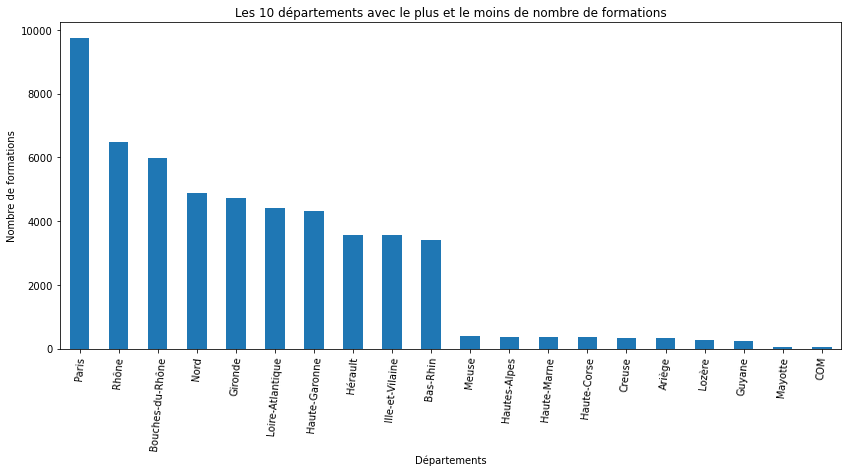

         Département  Nombre de formations
0              Paris                  9745
1              Rhône                  6481
2   Bouches-du-Rhône                  5990
3               Nord                  4884
4            Gironde                  4737
5   Loire-Atlantique                  4396
6      Haute-Garonne                  4329
7            Hérault                  3549
8    Ille-et-Vilaine                  3547
9           Bas-Rhin                  3404
10             Meuse                   390
11      Hautes-Alpes                   375
12       Haute-Marne                   370
13       Haute-Corse                   367
14            Creuse                   323
15            Ariège                   317
16            Lozère                   255
17            Guyane                   232
18           Mayotte                    55
19               COM                    41


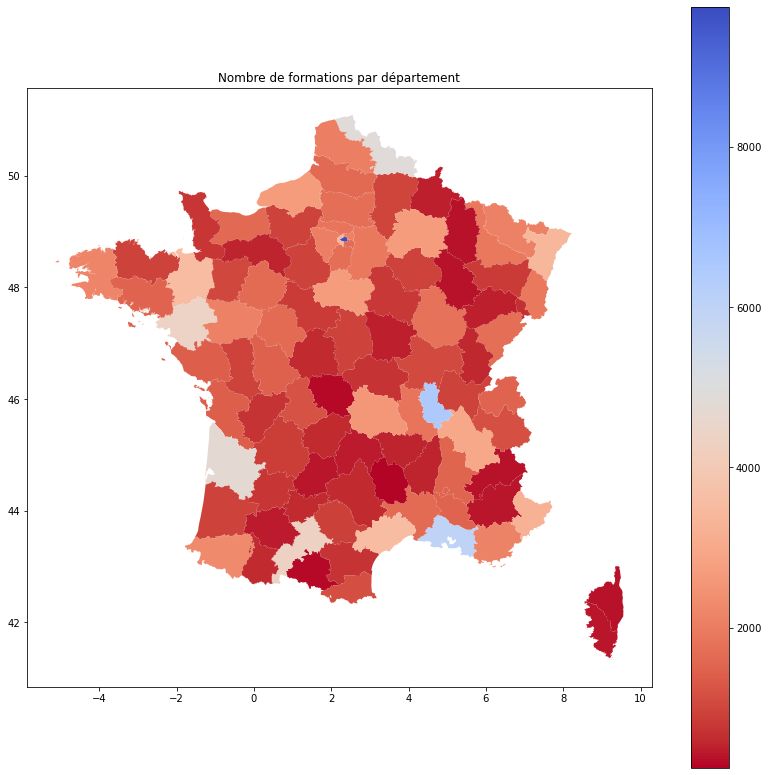

In [11]:
#2 - Execute same analysis for departments.

# Count nb formation, sort it. Keep 10 max, min.
formations_by_departement = data['nom_departement'].value_counts()
sorted_departements = data['nom_departement'].value_counts().sort_values(ascending=False)
top10_departements = sorted_departements.head(10)
bottom10_departements = sorted_departements.tail(10)
combined_departements = pd.concat([top10_departements, bottom10_departements])
combined_departements.plot(kind='bar', figsize=(14, 6))

plt.title('Les 10 départements avec le plus et le moins de nombre de formations')
plt.xlabel('Départements')
plt.ylabel('Nombre de formations')
plt.xticks(rotation=85)
plt.show()

# Create Table about previous data
combined_departements_df = combined_departements.reset_index()
combined_departements_df.columns = ['Département', 'Nombre de formations']
print(combined_departements_df)

# Make same as previous graphs
formations_by_departement = data['nom_departement'].value_counts().reset_index()
formations_by_departement.columns = ['departement', 'count']

# Load geoJSON about french departments, mix data with geoData, generate graph.
# Also departements = gpd.read_file('https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson')
departements = gpd.read_file('src/departements.geojson')

departements = departements.merge(formations_by_departement, left_on='nom', right_on='departement')

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
departements.plot(column='count', cmap='coolwarm_r', legend=True, ax=ax)
plt.title('Nombre de formations par département')
plt.show()


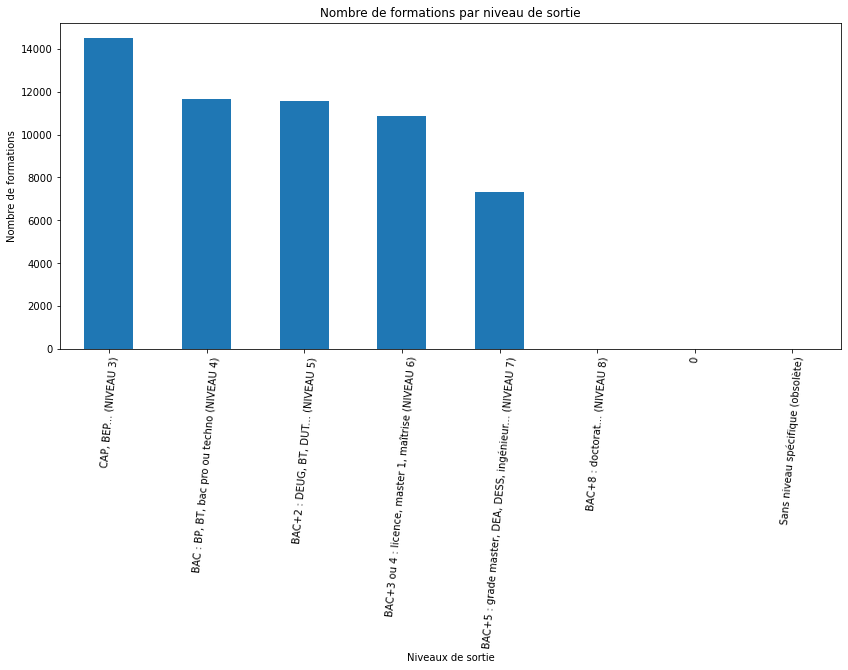

,count,count
0,"CAP, BEP... (NIVEAU 3)",14474
1,"BAC : BP, BT, bac pro ou techno (NIVEAU 4)",11651
2,"BAC+2 : DEUG, BT, DUT... (NIVEAU 5)",11546
3,"BAC+3 ou 4 : licence, master 1, maîtrise (NIVEAU 6)",10850
4,"BAC+5 : grade master, DEA, DESS, ingénieur... (NIVEAU 7)",7319
5,BAC+8 : doctorat... (NIVEAU 8),5
6,0,1
7,Sans niveau spécifique (obsolète),1


In [12]:
#3 Number of formation by education
formations_by_niveau = data['libelle_niveau_sortie_formation'].value_counts()

# Créer un graphique à barres
formations_by_niveau.plot(kind='bar', figsize=(14, 6))

plt.title('Nombre de formations par niveau de sortie')
plt.xlabel('Niveaux de sortie')
plt.ylabel('Nombre de formations')
plt.xticks(rotation=85)  # Ajuster l'angle de rotation des étiquettes en X
plt.show()


# Créer un DataFrame avec les données
formations_by_niveau_df = formations_by_niveau.reset_index().rename(columns={'index': 'niveau_sortie', 'libelle_niveau_sortie_formation': 'count'})

# Afficher le tableau
pd.set_option('display.max_colwidth', None)
display(formations_by_niveau_df)


Nombre de formations par niveau de sortie : Ce graphique montre le nombre total de formations pour chaque niveau de sortie, comme le baccalauréat, le BTS, le master, etc. Les barres verticales représentent les différents niveaux de sortie, tandis que la hauteur de chaque barre indique le nombre de formations correspondant à ce niveau. Ce graphique donne un aperçu de la répartition des formations en fonction de leur niveau.

NameError: name 'np' is not defined

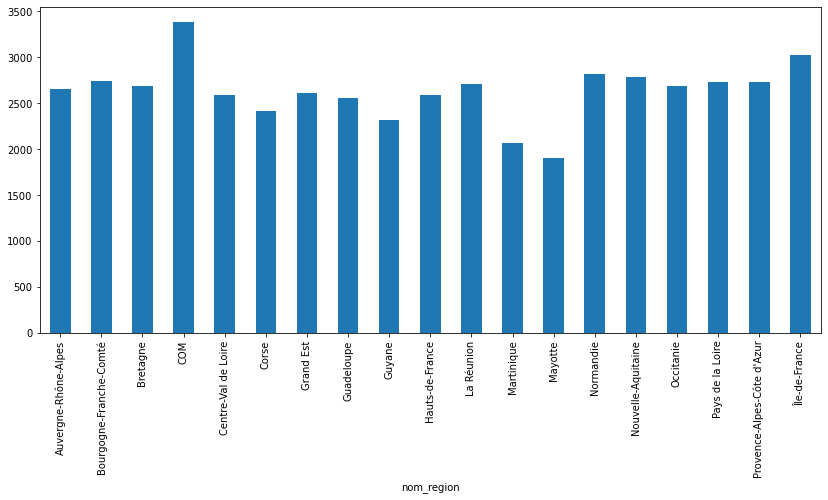

In [13]:
#4 Number of formation by OF (Formation Organism) 

avg_cost_by_region = data.groupby('nom_region')['frais_ttc_tot_mean'].mean()
std_cost_by_region = data.groupby('nom_region')['frais_ttc_tot_mean'].std()
fig, ax = plt.subplots(figsize=(14, 6))
avg_cost_by_region.plot(kind='bar', ax=ax)


x_coords = np.arange(len(avg_cost_by_region))

plt.errorbar(x_coords, avg_cost_by_region, yerr=[np.zeros(len(std_cost_by_region)), std_cost_by_region], 
            fmt='none', ecolor='black', capsize=10)

plt.title('Coût moyen des formations par région')
plt.xlabel('Régions')
plt.ylabel('Coût moyen (frais_ttc_tot_mean)')
plt.xticks(rotation=45)

plt.show()


In [ ]:
#Finding correlation between number formation and cost

formations_and_cost = data.groupby('nom_departement').agg({'intitule_certification': 'count', 'frais_ttc_tot_mean': 'mean'}).reset_index()
formations_and_cost.columns = ['nom_departement', 'nombre_formations', 'cout_moyen']
correlation_formations_cost = formations_and_cost['nombre_formations'].corr(formations_and_cost['cout_moyen'])

print(f"corrélation entre le nombre de formations et leur coût : {correlation_formations_cost}")


In [ ]:
# Calculer le ratio coût/durée
data['cout_duree_ratio'] = data['frais_ttc_tot_mean'] / data['nombre_heures_total_mean']

# Filtrer les données pour les deux groupes de départements
top10_departments_data = data[data['nom_departement'].isin(top10_departements.index)]
bottom10_departments_data = data[data['nom_departement'].isin(bottom10_departements.index)]

# Calculer les statistiques pour chaque groupe
top10_stats = top10_departments_data['cout_duree_ratio'].describe()
bottom10_stats = bottom10_departments_data['cout_duree_ratio'].describe()

# Fusionner les deux statistiques dans un seul DataFrame
stats_comparison = pd.concat([top10_stats, bottom10_stats], axis=1)
stats_comparison.columns = ['Top 10 départements', 'Bottom 10 départements']

print(stats_comparison)

In [ ]:
#6 Nombre de formations par code ROME :
# Combiner les colonnes code_rome_1, code_rome_2, code_rome_3, code_rome_4 et code_rome_5
all_romes = pd.concat([data['code_rome_1'], data['code_rome_2'], data['code_rome_3'], data['code_rome_4'], data['code_rome_5']]).dropna()

# Compter le nombre de formations par code ROME
formations_by_rome = all_romes.value_counts().nlargest(10)

# Créer un graphique à barres
formations_by_rome.plot(kind='bar', figsize=(14, 6))

plt.title('Nombre de formations par code ROME')
plt.xlabel('Codes ROME')
plt.ylabel('Nombre de formations')
plt.xticks(rotation=75)
plt.show()

In [ ]:
#7 Corr between cost and formation duration

plt.figure(figsize=(12, 6))
plt.scatter(data['nombre_heures_total_mean'], data['frais_ttc_tot_mean'])
plt.xlabel('Durée moyenne des formations (heures)')
plt.ylabel('Coût moyen des formations (EUR)')
plt.title('Corrélation entre le coût et la durée des formations')
plt.show()


ON VA MODIF DATA POUR LES PROCHAINS GRAPHS (on rajoute une col), à savoir. regrouper tous les fcod (formacodes)
sous 14 grands formats (domaine_{i} i > 1:5)

In FCod.xls we have two cols, one for every fcod, and another that tells a capital letter. Determining which domain it corresponds.
we use dict to make that

In [ ]:
#8  Formation distribution by level of exit, and field of specialisation (NSF)

#ne garder que le domaine 1 (a savoir le domaine principal)
data['libelle_nsf'] = data['domaine_1'].fillna('')

# Compter le nombre de formations par niveau de sortie et domaine de spécialité
formations_by_level_and_nsf = data.groupby(['libelle_niveau_sortie_formation', 'libelle_nsf']).size().reset_index(name='count')
formations_by_level_and_nsf_pivot = formations_by_level_and_nsf.pivot_table(values='count', index='libelle_niveau_sortie_formation', columns='libelle_nsf', fill_value=0)

# Créer un diagramme à barres empilées
fig, ax = plt.subplots(figsize=(14, 10))
formations_by_level_and_nsf_pivot.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Niveau de sortie', fontsize=12)
plt.ylabel('Nombre de formations', fontsize=12)
plt.title('Répartition des formations selon le niveau de sortie et le domaine de spécialité (NSF)', fontsize=14)
plt.xticks(rotation=30, fontsize=10, ha='center')
plt.yticks(fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fontsize=10)
plt.subplots_adjust(bottom=0.25)
plt.show()


In [ ]:
#9 10 most active formation organism
top_organismes = data['nom_of'].value_counts().head(10)

# Créer un graphique à barres
top_organismes.plot(kind='bar', figsize=(14, 6))
plt.xlabel('Organisme de formation')
plt.ylabel('Nombre de formations')
plt.title('Top 10 des organismes de formation les plus actifs')
plt.show()

In [ ]:
#10 Most reccurent formacode

# Analyse des formations par code Formacode
formations_by_formacode = data['libelle_code_formacode_principal'].value_counts().head(20)

# Créer un graphique à barres
formations_by_formacode.plot(kind='bar', figsize=(18, 6))
plt.xlabel('Code Formacode')
plt.ylabel('Nombre de formations')
plt.title('Top 20 des codes Formacode les plus courants')
plt.show()


In [ ]:
#11 Most reccurent formacode reduced as big domain

# Analyse des formations par code Formacode
formations_by_formacode = data['domaine_1'].value_counts().head(20)

# Créer un graphique à barres
formations_by_formacode.plot(kind='bar', figsize=(18, 6))
plt.xlabel('Code Formacode')
plt.ylabel('Nombre de formations')
plt.title('Top 20 des codes Formacode les plus courants')
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)


departements = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/3096e551-c68d-40ce-8972-a228c94c0ad1')
formations_by_departement = data.groupby(['code_departement', 'libelle_niveau_sortie_formation']).size().reset_index(name='count')
departements = departements.merge(data[['code_departement']].drop_duplicates(), left_on='code_insee', right_on='code_departement')
departements = departements.merge(formations_by_departement, on='code_departement')

def is_metropolitan_departement(code_insee):
    try:
        code_insee_int = int(code_insee)
        return code_insee_int < 96
    except ValueError:
        return False

departements = departements[departements['code_insee'].apply(is_metropolitan_departement)]

# Vérifier et supprimer les valeurs manquantes
departements = departements.dropna(subset=['count'])

# Calculez le nombre total de formations par département
formations_by_departement_total = data.groupby(['code_departement']).size().reset_index(name='departement_total')
departements = departements.merge(formations_by_departement_total, on='code_departement')

# Normaliser les données en calculant le pourcentage
departements['percentage'] = (departements['count'] / departements['departement_total']) * 100

# Ordonner les niveaux et exclure les niveaux indésirables
niveaux = [
    'CAP, BEP... (NIVEAU 3)',
    'BAC : BP, BT, bac pro ou techno (NIVEAU 4)',
    'BAC+2 : DEUG, BT, DUT... (NIVEAU 5)',
    'BAC+3 ou 4 : licence, master 1, maîtrise (NIVEAU 6)',
    'BAC+5 : grade master, DEA, DESS, ingénieur... (NIVEAU 7)',
    'BAC+8 : doctorat... (NIVEAU 8)'
]

for niveau in niveaux:
    fig, ax = plt.subplots(1, 1, figsize=(14, 14))
    
    ax.set_xlim(-5.5, 10.5)
    ax.set_ylim(41, 52)
    
    # Afficher les cartes normalisées
    departements[departements['libelle_niveau_sortie_formation'] == niveau].plot(column='percentage', cmap='coolwarm_r', legend=True, ax=ax)

    # Ajouter les contours des départements
    departements.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

    plt.title(f"Pourcentage de formations par département pour le niveau de sortie: {niveau}")
    plt.show()


In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

departements = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/3096e551-c68d-40ce-8972-a228c94c0ad1')
formations_by_departement = data.groupby(['code_departement', 'domaine_1']).size().reset_index(name='count')
departements = departements.merge(data[['code_departement']].drop_duplicates(), left_on='code_insee', right_on='code_departement')
departements = departements.merge(formations_by_departement, on='code_departement')

def is_metropolitan_departement(code_insee):
    try:
        code_insee_int = int(code_insee)
        return code_insee_int < 96
    except ValueError:
        return False

departements = departements[departements['code_insee'].apply(is_metropolitan_departement)]

# Vérifier et supprimer les valeurs manquantes
departements = departements.dropna(subset=['count'])

# Calculez le nombre total de formations par département
formations_by_departement_total = data.groupby(['code_departement']).size().reset_index(name='departement_total')
departements = departements.merge(formations_by_departement_total, on='code_departement')

# Normaliser les données en calculant le pourcentage
departements['percentage'] = (departements['count'] / departements['departement_total']) * 100

# Obtenir tous les domaines uniques
domaines = data['domaine_1'].unique()

for domaine in domaines:
    fig, ax = plt.subplots(1, 1, figsize=(14, 14))
    
    ax.set_xlim(-5.5, 10.5)
    ax.set_ylim(41, 52)
    
    # Afficher les cartes normalisées
    departements[departements['domaine_1'] == domaine].plot(column='percentage', cmap='coolwarm_r', legend=True, ax=ax)

    # Ajouter les contours des départements
    departements.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

    plt.title(f"Pourcentage de formations par département pour le domaine: {domaine}")
    plt.show()

In [ ]:

# Filtrer les données pour le domaine "Formation à un logiciel"
data_logiciel = data[data['domaine_1'] == "Formation à un logiciel"]

# Afficher les premières lignes du dataset filtré
print("Premières lignes du dataset filtré :")
print(data_logiciel.head())





In [ ]:
# Afficher le nombre de formations par département pour le domaine "Formation à un logiciel"
print("\nNombre de formations par département :")
formations_logiciel_by_departement = data_logiciel.groupby(['code_departement']).size().reset_index(name='count')
print(formations_logiciel_by_departement)

In [ ]:
# Afficher le nombre de formations par niveau de sortie pour le domaine "Formation à un logiciel"
print("\nNombre de formations par niveau de sortie :")
formations_logiciel_by_niveau = data_logiciel.groupby(['libelle_niveau_sortie_formation']).size().reset_index(name='count')
print(formations_logiciel_by_niveau)

In [ ]:
import plotly.express as px



# Load the data
departements = px.data.election()



# Define the levels of education to plot
niveaux = ["BAC", "BAC+2", "BAC+3/4", "BAC+5"]



# Loop through each level of education and create a choropleth map
for niveau in niveaux:
    # Filter the data by the current level of education
    data_niveau = departements[departements['libelle_niveau_sortie_formation'] == niveau]

    # Create the choropleth map
    fig = px.choropleth_mapbox(data_niveau,
                               geojson=data_niveau.geometry,
                               locations=data_niveau.index,
                               color='percentage',
                               color_continuous_scale="coolwarm",
                               mapbox_style="carto-positron",
                               zoom=5,
                               center={"lat": 46.603354, "lon": 1.888334},
                               opacity=0.5,
                               labels={'percentage': f'Pourcentage de formations pour le niveau de sortie: {niveau}'},
                               hover_name='nom')

# Update the layout
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Show the plot
fig.show()

In [ ]:



# Créer un tableau croisé dynamique pour observer les données
tableau_croise = pd.pivot_table(data_logiciel, values='intitule_certification', index=['code_departement'], columns=['libelle_niveau_sortie_formation'], aggfunc='count', fill_value=0)
print("\nTableau croisé dynamique :")
print(tableau_croise)


In [ ]:
for domaine in domaines:
    data_domaine = departements[departements['domaine_1'] == domaine]
    fig = px.choropleth_mapbox(data_domaine,
                               geojson=data_domaine.geometry,
                               locations=data_domaine.index,
                               color='percentage',
                               color_continuous_scale="coolwarm",
                               mapbox_style="carto-positron",
                               zoom=5, center={"lat": 46.603354, "lon": 1.888334},
                               opacity=0.5,
                               labels={'percentage': f'Pourcentage de formations pour le domaine: {domaine}'},
                               hover_name='nom'
                               )
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.show()


In [ ]:
#12 Formation distribution by level of exit, and department
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore", category=UserWarning)

try:    
    departements = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/3096e551-c68d-40ce-8972-a228c94c0ad1')
    formations_by_departement = data.groupby(['code_departement', 'libelle_niveau_sortie_formation']).size().reset_index(name='count')
    departements = departements.merge(formations_by_departement, left_on='code_insee', right_on='code_departement')

    def is_metropolitan_departement(code_insee):
        try:
            code_insee_int = int(code_insee)
            return code_insee_int < 96
        except ValueError:
            return False

    departements = departements[departements['code_insee'].apply(is_metropolitan_departement)]

    # Vérifier et supprimer les valeurs manquantes
    departements = departements.dropna(subset=['count'])

    niveaux = data['libelle_niveau_sortie_formation'].unique()
    for niveau in niveaux:
        fig, ax = plt.subplots(1, 1, figsize=(14, 14))
        
        ax.set_xlim(-5.5, 10.5)
        ax.set_ylim(41, 52)
        
        departements[departements['libelle_niveau_sortie_formation'] == niveau].plot(column='count', cmap='coolwarm_r', legend=True, ax=ax)
        plt.title(f"Nombre de formations par département pour le niveau de sortie: {niveau}")
        plt.show()
except:
    pass



In [ ]:
#7 Taux de certifications RNCP et RS par domaine de spécialité (NSF):
# Compter le nombre de formations avec des certifications RNCP et RS par domaine de spécialité
certifications_by_nsf = data.groupby(['domaine_1', 'RNCP', 'RS']).size().reset_index(name='count')
certifications_by_nsf_pivot = certifications_by_nsf.pivot_table(values='count', index='domaine_1', columns=['RNCP', 'RS'], fill_value=0)

# Calculer les pourcentages
certifications_by_nsf_pivot = certifications_by_nsf_pivot.div(certifications_by_nsf_pivot.sum(axis=1), axis=0) * 100


print(certifications_by_nsf)
# # Créer un graphique à barres empilées
# certifications_by_nsf_pivot.plot(kind='bar', stacked=True, figsize=(14, 6))
# plt.xlabel('Domaine de spécialité (NSF)')
# plt.ylabel('Pourcentage de formations avec des certifications RNCP et RS')
# plt.title('Taux de certifications RNCP et RS par domaine de spécialité (NSF)')
# plt.show()


In [ ]:
#8 Ratio Time/Cost by Big Domain


grouped = data.groupby('domaine_1').agg({'frais_ttc_tot_mean': 'mean', 'nombre_heures_total_mean': 'mean'})
grouped['cout_duree_ratio'] = grouped['frais_ttc_tot_mean'] / grouped['nombre_heures_total_mean']


fig, ax = plt.subplots(figsize=(12, 6))
grouped['cout_duree_ratio'].plot(kind='bar', ax=ax)
ax.set_ylabel('Ratio coût-durée')
ax.set_xlabel('Domaine 1')
ax.set_title('Ratio coût-durée par grand domaine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#9 Top 10 organism with highest number of disciplines (NSF) differently:

nsf_count = data.groupby('siret_of')['libelle_nsf'].nunique().reset_index(name='unique_nsf_count')
nsf_count = data.groupby(['siret_of', 'nom_of'])['libelle_nsf'].nunique().reset_index(name='unique_nsf_count')
top10_nsf = nsf_count.sort_values('unique_nsf_count', ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(data=top10_nsf, x='nom_of', y='unique_nsf_count')
plt.title('Top 10 des organismes de formation avec le plus grand nombre de disciplines (NSF) différentes')
plt.xlabel("Nom de l'organisme de formation")
plt.ylabel('Nombre de NSF uniques')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#10 Corrél between diffents disciplines (NSF) and the number of formations(Formacode) :

# Compter le nombre de NSF uniques pour chaque SIRET
nsf_count = data.groupby('siret_of')['libelle_nsf'].nunique().reset_index(name='unique_nsf_count')

# Compter le nombre de Formacode uniques pour chaque SIRET
unique_formacode = data.groupby('siret_of')['code_formacode_1'].nunique().reset_index(name='unique_formacode_count')

# Fusionner les données de NSF uniques et de Formacode uniques
correlation_data = nsf_count.merge(unique_formacode, on='siret_of')

# Nuage de points
plt.figure(figsize=(12, 6))
sns.scatterplot(data=correlation_data, x='unique_nsf_count', y='unique_formacode_count')
plt.title('Corrélation entre le nombre de disciplines (NSF) différentes et le nombre de formations (Formacode) différentes')
plt.xlabel('Nombre de disciplines (NSF) différentes')
plt.ylabel('Nombre de formations (Formacode) différentes')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('src/moncompteformation_catalogueformation.csv', sep=';')

nsf_columns = ['code_nsf_1', 'code_nsf_2', 'code_nsf_3']
nsf_transactions = []

for _, row in data.iterrows():
    nsf_codes = row[nsf_columns].dropna().values
    nsf_transactions.append(nsf_codes)

te = TransactionEncoder()
te_ary = te.fit(nsf_transactions).transform(nsf_transactions)
df_nsf = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_nsf, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

cooccurrence_matrix = np.zeros((len(te.columns_), len(te.columns_)))

for _, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            antecedent_index = te.columns_.tolist().index(antecedent)
            consequent_index = te.columns_.tolist().index(consequent)
            cooccurrence_matrix[antecedent_index, consequent_index] = rule['confidence']

plt.figure(figsize=(12, 8))
sns.heatmap(cooccurrence_matrix, xticklabels=te.columns_, yticklabels=te.columns_, annot=True, cmap="coolwarm", cbar=False)
plt.title('Association Rules Heatmap for NSF Codes')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


In [ ]:
# Extraire la première lettre de la chaîne de caractères dans la dernière colonne de fcod
fcod['first_letter'] = fcod.iloc[:, -1].str[0]

# Créer une fonction pour obtenir le domaine correspondant au Formacode
def get_domain(formacode):
    first_letter = fcod.loc[fcod.iloc[:, 0] == formacode, 'first_letter'].values
    if len(first_letter) > 0:
        return Dict_Domaine[first_letter[0]]
    else:
        return None

# Ajouter une nouvelle colonne 'domaine' à data en appliquant la fonction get_domain
# Ajouter une nouvelle colonne 'domaine' à data en appliquant la fonction get_domain pour chaque colonne de Formacode
data['domaine_1'] = data['code_formacode_1'].apply(get_domain)
data['domaine_2'] = data['code_formacode_2'].apply(get_domain)
data['domaine_3'] = data['code_formacode_3'].apply(get_domain)
data['domaine_4'] = data['code_formacode_4'].apply(get_domain)
data['domaine_5'] = data['code_formacode_5'].apply(get_domain)


In [ ]:
fcod['code'] = fcod['code'].astype(str)

# Extraire la première lettre de la chaîne de caractères dans la dernière colonne de fcod
fcod['first_letter'] = fcod.iloc[:, -1].str[0]

# Créer une fonction pour obtenir le domaine correspondant au Formacode
def get_domain(formacode):
    first_letter = fcod.loc[fcod.iloc[:, 0] == formacode, 'first_letter'].values
    if len(first_letter) > 0:
        return Dict_Domaine[first_letter[0]]
    else:
        return None

# Ajouter une nouvelle colonne 'domaine' à data en appliquant la fonction get_domain pour chaque colonne de Formacode
for i in range(1, 6):
    column_name = f"code_formacode_{i}"
    domain_column_name = f"domaine_{i}"
    data[domain_column_name] = data[column_name].apply(lambda x: get_domain(str(int(x))) if not pd.isna(x) else None)


In [ ]:
for i in range(1, 6):
    column_name = f"code_formacode_{i}"
    domain_column_name = f"domaine_{i}"
    data[domain_column_name] = data[column_name].apply(lambda x: get_domain(str(int(x))) if not pd.isna(x) else None)



In [ ]:
print(data['domaine_1'].head(5))

In [ ]:
print(data.columns)

In [ ]:
# Afficher les premières lignes de data pour vérifier si les colonnes 'domaine' ont été ajoutées correctement
#print(data.columns)

print(fcod['first_letter'])


In [ ]:
# test_formacodes = ['11054', '31754', '42554']
# for formacode in test_formacodes:
#     print(f"Formacode: {formacode}, Domaine: {get_domain(formacode)}")


In [ ]:
print(fcod.loc[fcod['code'].isin(test_formacodes), ['code', 'first_letter']])
print(fcod.columns)




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('src/moncompteformation_catalogueformation.csv', sep=';')

nsf_columns = ['code_nsf_1', 'code_nsf_2', 'code_nsf_3']
nsf_transactions = []

for _, row in data.iterrows():
    nsf_codes = row[nsf_columns].dropna().values
    nsf_transactions.append(nsf_codes)

te = TransactionEncoder()
te_ary = te.fit(nsf_transactions).transform(nsf_transactions)
df_nsf = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_nsf, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

cooccurrence_matrix = np.zeros((len(te.columns_), len(te.columns_)))

for _, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            antecedent_index = te.columns_.index(antecedent)
            consequent_index = te.columns_.index(consequent)
            cooccurrence_matrix[antecedent_index, consequent_index] = rule['confidence']

plt.figure(figsize=(12, 8))
sns.heatmap(cooccurrence_matrix, xticklabels=te.columns_, yticklabels=te.columns_, annot=True, cmap="coolwarm", cbar=False)
plt.title('Association Rules Heatmap for NSF Codes')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

In [ ]:
#print(fcod.head(5))



In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Créez une colonne 'domaines' en combinant les colonnes 'domaine_1' à 'domaine_5'.
data['domaines'] = data[['domaine_1']].values.tolist()

# 2. Créez un DataFrame avec les combinaisons de domaines pour chaque organisme de formation.
domaines_list = data['domaines'].tolist()

# Supprimer les valeurs None
domaines_list = [[x for x in domaine_set if x is not None] for domaine_set in domaines_list]

# Appliquer l'encodeur de transaction
te = TransactionEncoder()
te_ary = te.fit(domaines_list).transform(domaines_list)
domaines_df = pd.DataFrame(te_ary, columns=te.columns_)


In [ ]:
# Appliquer l'algorithme Apriori pour obtenir les itemsets fréquents
frequent_itemsets = apriori(domaines_df, min_support=0.01, use_colnames=True)

# Calculer les règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Trier les règles par confiance
rules = rules.sort_values(['confidence'], ascending=False)

# Afficher les 10 premières règles
print(rules.head(10))




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une matrice de corrélation
corr_matrix = domaines_df.corr()

# Créer une heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap des domaines")
plt.show()


In [ ]:
# Filtrer les 50 meilleures règles basées sur le "lift"
top_50_rules = rules.nlargest(50, "lift")

# Créer une matrice de corrélation vide
unique_domaines = list(set([item for sublist in domaines_list for item in sublist]))
matrix_size = len(unique_domaines)
corr_matrix = pd.DataFrame(0, index=unique_domaines, columns=unique_domaines, dtype=float)

# Remplir la matrice de corrélation avec les valeurs de "lift"
for _, row in top_50_rules.iterrows():
    antecedent = next(iter(row['antecedents']))
    consequent = next(iter(row['consequents']))
    lift = row['lift']
    corr_matrix.at[antecedent, consequent] = lift
    corr_matrix.at[consequent, antecedent] = lift

# Créer une heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap des domaines - Top 50 règles basées sur le lift")
plt.show()


In [ ]:
# Appliquer l'algorithme Apriori pour obtenir les itemsets fréquents
frequent_itemsets = apriori(filtered_domaines_df, min_support=0.01, use_colnames=True)

# Calculer les règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Trier les règles par lift
rules = rules.sort_values(['lift'], ascending=False)

# Afficher les 10 premières règles basées sur le lift
print(rules.head(10))


In [ ]:
# Afficher les différentes valeurs uniques de la colonne 'domaine_1'
unique_domaine_1 = data["domaine_1"].unique()

print("Valeurs uniques de la colonne 'domaine_1':")
print(unique_domaine_1)

# Compter le nombre de valeurs uniques dans la colonne 'domaine_1'
unique_domaine_1_count = data["domaine_1"].nunique()

print("Nombre de types différents dans la colonne 'domaine_1':", unique_domaine_1_count)



In [ ]:
import numpy as np

# 1. Utiliser uniquement la colonne 'domaine_1'
data['domaines'] = data[['domaine_1']].values.tolist()

# 2. Filtrez les organismes qui ont au moins deux domaines différents
data['unique_domaines'] = data.groupby('nom_of')['domaine_1'].transform('nunique') > 1
data_filtered = data[data['unique_domaines']]

# 3. Créez un DataFrame avec les combinaisons de domaines pour chaque organisme de formation
domaines_list = data_filtered['domaines'].tolist()

# Supprimer les valeurs None
domaines_list = [[x for x in domaine_set if x is not None] for domaine_set in domaines_list]

# Appliquer l'encodeur de transaction
te = TransactionEncoder()
te_ary = te.fit(domaines_list).transform(domaines_list)
domaines_df = pd.DataFrame(te_ary, columns=te.columns_)

# 4. Filtrez le DataFrame `domaines_df` pour ne conserver que les colonnes correspondant aux 14 domaines
unique_domaines = [x for x in data["domaine_1"].unique().tolist() if x is not None]
filtered_domaines_df = domaines_df[unique_domaines]

# 5. Calculez la matrice de corrélation et affichez la heatmap
corr_matrix = filtered_domaines_df.corr()

# Masquer la partie inférieure gauche de la matrice de corrélation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Heatmap des domaines")
plt.show()


In [ ]:
print(filtered_domaines_df.head(10))

In [ ]:
# Créer un graphique à bandes (stripplot)
plt.figure(figsize=(16, 10))
sns.stripplot(data=data, x='nom_region', y='frais_ttc_tot_mean', hue='libelle_niveau_sortie_formation', palette='viridis', jitter=True, dodge=True)
plt.title("Répartition des prix de formation en fonction du niveau de sortie et de la région")
plt.xlabel("Région de France")
plt.ylabel("Prix moyen de formation (EUR)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Niveau de sortie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Convertir les frais de formation en catégories
price_bins = pd.cut(data['frais_ttc_tot_mean'], bins=[0, 500, 1000, 2000, 5000, 10000, 20000], include_lowest=True)
data['price_categories'] = price_bins

# Créer un tableau croisé pour les données de prix de formation
price_pivot = data.pivot_table(index=['nom_region'], columns=['libelle_niveau_sortie_formation', 'price_categories'], values='numero_formation', aggfunc='count', fill_value=0)

# Normaliser les données pour chaque région
price_pivot_normalized = price_pivot.div(price_pivot.sum(axis=1), axis=0)

# Créer un diagramme de Likert (histogramme empilé)
ax = price_pivot_normalized.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title("Répartition des prix de formation en fonction du niveau de sortie et de la région")
plt.xlabel("Région de France")
plt.ylabel("Proportion des formations")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Niveau de sortie et catégorie de prix', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()